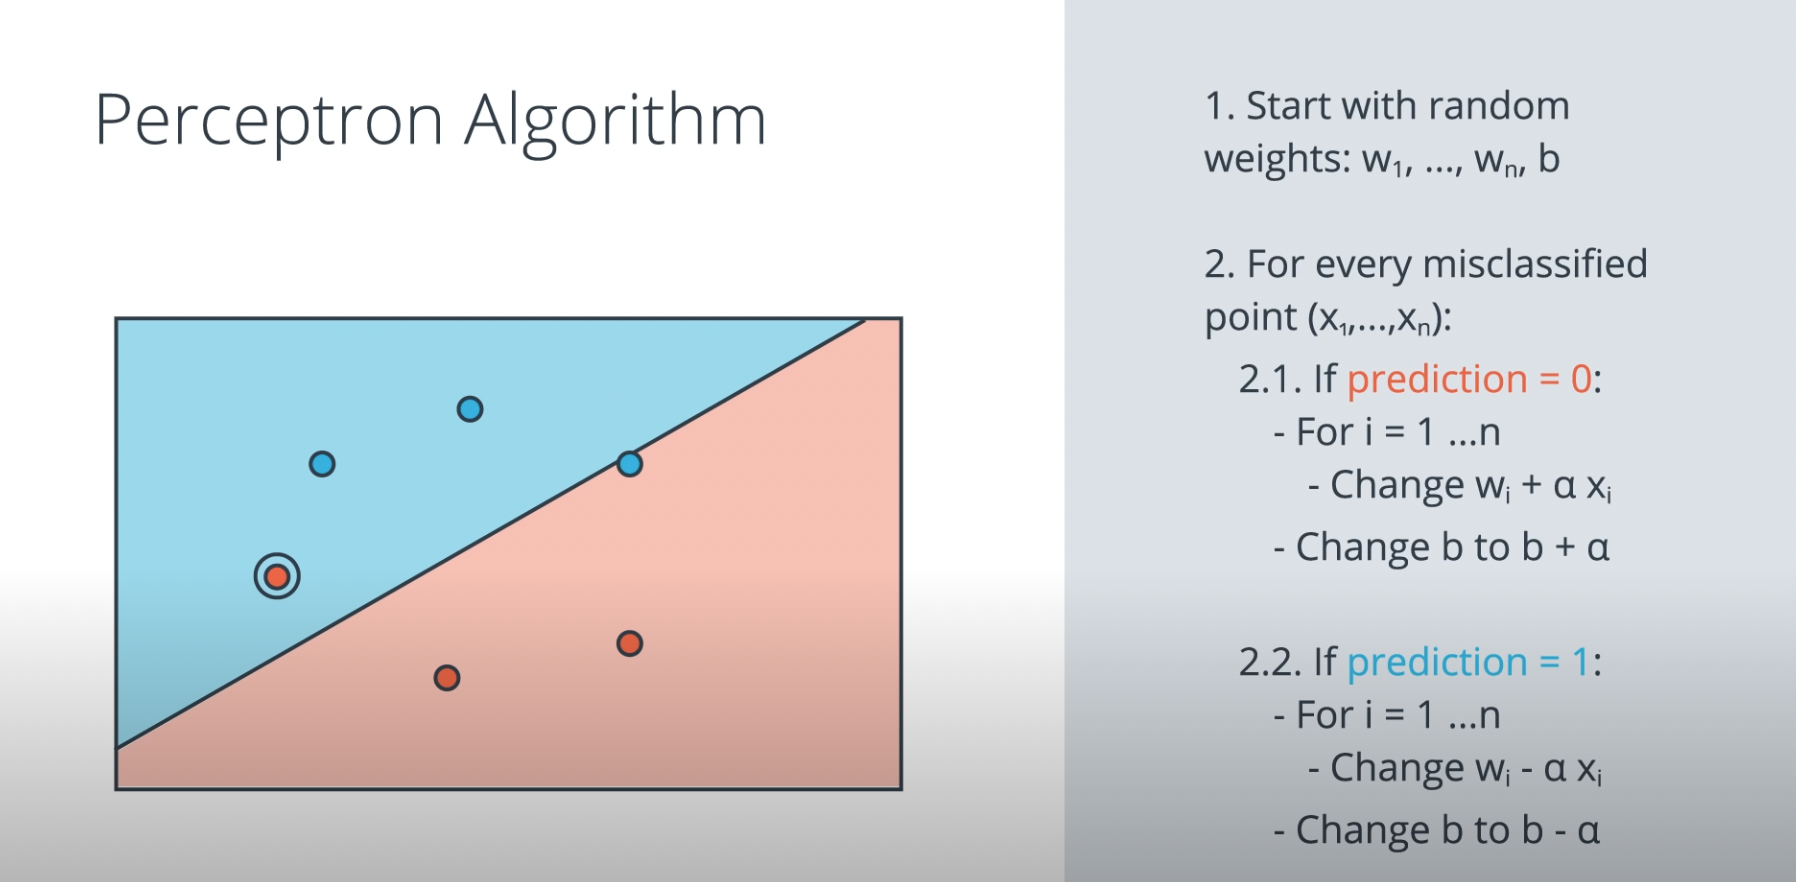

In [53]:
from IPython.display import Image

Image(filename='../images/perceptron_trick.png')

In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('data.csv')
df.head()

,0.78051,-0.063669,1
0,0.28774,0.29139,1
1,0.40714,0.17878,1
2,0.29230,0.42170,1
3,0.50922,0.35256,1
4,0.27785,0.10802,1


In [65]:
X = df.iloc[:, :2].values.reshape((len(df), 2, 1))
y = df.iloc[:, 2].values

In [78]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(2)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b).reshape(-1)[0])

In [79]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    for i in range(len(X)):
        if prediction(X[i].T, W, b) != y[i]:
            if prediction(X[i].T, W, b) == 0:
                W = W + learn_rate * X[i]
                b = b + learn_rate
            if prediction(X[i].T, W, b) == 1:
                W = W - learn_rate * X[i]
                b = b - learn_rate
    return W, b

In [80]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X[0]), max(X[0])
    y_min, y_max = min(X[1]), max(X[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [81]:
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25)

In [82]:
import plotly.express as px
import plotly.graph_objects as go

In [83]:
fig = px.scatter(
    df, 
    x=df.iloc[:, 0], 
    y=df.iloc[:, 1], 
    color=df.iloc[:, 2].astype(str), 
    color_discrete_sequence=['red', 'blue']
)

for i in range(len(boundary_lines)-1):
    params = boundary_lines[i]
    fig.add_trace(
        go.Scatter(
            x=df.iloc[:, 0], 
            y=params[0][0]*df.iloc[:, 0] + params[1][0],
            mode='lines', 
            line=dict(dash='dash'), 
            line_color='grey', 
            showlegend=False, 
            opacity = 0.5
        )
    )

fig.add_trace(go.Scatter(x=df.iloc[:, 0], y=boundary_lines[-1][0][0]*df.iloc[:, 0] + boundary_lines[-1][1][0],
                             mode='lines', line_color='black', showlegend=False))

fig.show()